In [1]:
# connected GPU #CONNECT IT

In [ ]:
# ANN

In [2]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.3 kB/s 
     |████████████████████████████████| 438 kB 62.3 MB/s 
     |████████████████████████████████| 5.8 MB 47.7 MB/s 
     |████████████████████████████████| 1.6 MB 55.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
# vl work with version greater than 2.0 so we get the keras integrated with it.

In [3]:
import tensorflow as tf
print(tf.__version__)#it has keras integrated

2.9.1


In [4]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# binary classification model - cust vl exit or not. If u want to prevent then provide some services. so vl create model to see if cust vl leave or not

In [ ]:
# divide the dataset into independent & dependent features

In [ ]:
# vl remove rowno, name - not needed

In [9]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
# we have categorical features.. need to fix this. less category so one hot we can use

In [13]:
# so lets start with Feature engineering

In [14]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [15]:
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [17]:
pd.get_dummies(X['Geography'],drop_first=True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [18]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [20]:
X.drop(['Geography','Gender'], axis=1, inplace=True)

In [21]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58


In [19]:
# concat these variable with dataframe

In [22]:
pd.concat([X,geography,gender], axis=1) #column wise so write axis=1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [23]:
X=pd.concat([X,geography,gender], axis=1) #column wise so write axis=1

In [24]:
#splitting the dataset into training & test set
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
# ANN - Feature scaling

In [27]:
#feature scaling

from sklearn.preprocessing import StandardScaler # based on z score is stand scaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train) 

X_test=sc.transform(X_test) 



In [28]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [29]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [30]:
X_train.shape

(8000, 11)

In [31]:
X_test.shape

(2000, 11)

In [32]:
# fit transform is used only in training dataset - to avoid data leakage

In [33]:
## Part 2 - ANN

ANN

In [34]:
#Tensorflow  - google
# pytorch - facebook
# keras used tensorflow -before.
#keras is inside tensforflow  - now



In [35]:
from tensorflow.keras.models import Sequential #all neural n/w at once

from tensorflow.keras.layers import Dense #for I/p, hidden layers and o/p layers

from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU #activation function used in HL

from tensorflow.keras.layers import Dropout #to reduce overfitting

In [36]:
# lets initialize the ANN

classifier=Sequential()



In [37]:
# adding the input layer - x_train - 11 col

classifier.add(Dense(units=11,activation='relu')) #11 features/col are there in dataset
# and relu will get applied to the next upcoming layer.





In [38]:
# adding the first hidden layer

classifier.add(Dense(units=7,activation='relu')) #lets take 7, whatever you want

In [39]:
# adding the second hidden layer

classifier.add(Dense(units=6,activation='relu'))

In [40]:
# adding the output layer

classifier.add(Dense(1,activation='sigmoid'))

In [41]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
#adam uses by default learning rate of 0.01

In [43]:
# if u want to decide ur own learning rate use below with whatever value we want

import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [44]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000
536/536 [==============================] - 4s 4ms/step - loss: 0.4817 - accuracy: 0.8037 - val_loss: 0.4358 - val_accuracy: 0.8137
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4195 - accuracy: 0.8257 - val_loss: 0.4133 - val_accuracy: 0.8239
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4063 - accuracy: 0.8302 - val_loss: 0.4081 - val_accuracy: 0.8213
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3972 - accuracy: 0.8345 - val_loss: 0.4024 - val_accuracy: 0.8277
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3909 - accuracy: 0.8339 - val_loss: 0.3966 - val_accuracy: 0.8258
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3841 - accuracy: 0.8341 - val_loss: 0.3890 - val_accuracy: 0.8258
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3762 - accuracy: 0.8362 - val_loss: 0.3810 - val_accuracy:

### at one point of time the accuracy will become almost same
##so where to stop ???

In [ ]:
# how many no. of epochs to decide. 

In [ ]:
# early stopping - when the accuracy is not increasing , the training vl stop automatically.

In [ ]:
# early stopping - we will have to add that code

#model_history will give all the parameters

In [45]:
#list all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

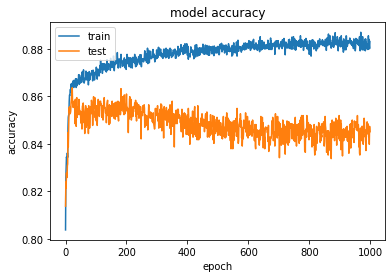

In [46]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

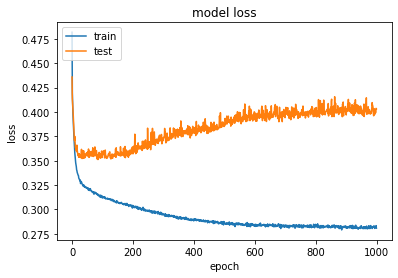

In [47]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1471,  124],
       [ 198,  207]])

In [50]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [51]:
score

0.839

In [52]:
# yaye :)

In [54]:
# get the weights
classifier.get_weights()

[array([[-5.85192926e-02,  7.85414502e-03,  2.05926120e-01,
         -1.57477334e-01, -4.17938322e-01,  4.24100906e-01,
          1.40196569e-02, -1.94820598e-01, -4.39715415e-01,
          3.38146299e-01, -4.88933641e-03],
        [ 3.56664628e-01, -3.35925847e-01,  2.20992041e+00,
          5.99291325e-01,  4.09748763e-01, -3.21540743e-01,
          2.97852248e-01, -1.00041854e+00,  1.57663262e+00,
          1.30797625e+00, -9.42528427e-01],
        [ 4.14961996e-03,  2.34612718e-01, -9.50845838e-01,
          1.20042875e-01,  4.24543768e-02,  5.23655534e-01,
          1.39577538e-02, -4.16918360e-02, -5.70032537e-01,
          1.67871118e+00, -9.12177414e-02],
        [-4.34217155e-01, -1.20081377e+00, -1.26191497e+00,
         -1.40556309e-04,  4.36717212e-01, -1.66372728e+00,
         -1.65758109e+00, -1.09937474e-01, -9.90984082e-01,
          3.18877965e-01,  9.65401158e-02],
        [ 1.89414263e+00, -4.32657272e-01, -8.43008161e-02,
         -1.28550124e+00, -5.48447430e-01, -